## Step one

In [ ]:
import cv2
import numpy as np

def canny(image):
    gray = cv2.cvtColor(lane_image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

filepath = "C:\\Users\\Aung Thiha\\Lane Detection\\test_image.png"
image = cv2.imread(filepath)
lane_image = np.copy(image)
canny = canny(lane_image)

cv2.imshow("lane",canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

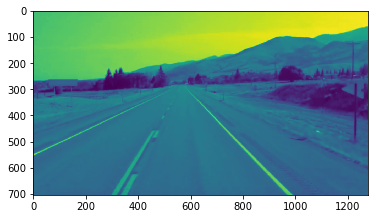

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def canny(image):
    gray = cv2.cvtColor(lane_image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

filepath = "C:\\Users\\Aung Thiha\\Lane Detection\\test_image.png"
image = cv2.imread(filepath)
lane_image = np.copy(image)
canny = canny(lane_image)

plt.imshow(canny)
plt.show()

## Step two ( Define White Traingle Region)

In [ ]:
import cv2
import numpy as np

def canny(image):
    gray = cv2.cvtColor(lane_image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,triangle,255)
    return mask

cv2.namedWindow("lane",cv2.WINDOW_GUI_NORMAL)
filepath = "C:\\Users\\Aung Thiha\\Lane Detection\\test_image.png"
image = cv2.imread(filepath)
lane_image = np.copy(image)
canny = canny(lane_image)

cv2.imshow("lane",region_of_interest(canny))
cv2.waitKey(0)
cv2.destroyAllWindows()

## Extract Region of Lane

In [8]:
import cv2
import numpy as np

def canny(image):
    gray = cv2.cvtColor(lane_image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    poly_mask=cv2.fillPoly(mask,triangle,255)             # poly_mask = cv2.fillPoly(mask,triangle,255)
    #cv2.imshow("Poly Mask",poly_mask)
    masked_image = cv2.bitwise_and(image,mask)  # masked_image = cv2.bitwise_and(image,poly_mask)
    return masked_image

cv2.namedWindow("lane",cv2.WINDOW_GUI_NORMAL)
filepath = "C:\\Users\\Aung Thiha\\Lane Detection\\test_image.png"
image = cv2.imread(filepath)
lane_image = np.copy(image)
canny = canny(lane_image)
#cv2.imshow("Canny",canny)
cropped_image = region_of_interest(canny)

cv2.imshow("lane",region_of_interest(cropped_image))
cv2.waitKey(0)
cv2.destroyAllWindows()

## Hough Line Transform

https://vovkos.github.io/doxyrest-showcase/opencv/sphinxdoc/group_imgproc_feature.html#doxid-dd-d1a-group-imgproc-feature-1ga8618180a5948286384e3b7ca02f6feeb

In [ ]:
import cv2
import numpy as np

def canny(image):
    gray = cv2.cvtColor(lane_image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,triangle,255)             # poly_mask = cv2.fillPoly(mask,triangle,255)
    masked_image = cv2.bitwise_and(image,mask)  # masked_image = cv2.bitwise_and(image,poly_mask)
    return masked_image

def display_lines(image,lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image , (x1,y1) ,(x2,y2),(0,255,0) , 4 )
    return line_image

cv2.namedWindow("lane",cv2.WINDOW_GUI_NORMAL)
filepath = "C:\\Users\\Aung Thiha\\Lane Detection\\test_image.png"
image = cv2.imread(filepath)
lane_image = np.copy(image)
canny = canny(lane_image)

cropped_image = region_of_interest(canny)
lines = cv2.HoughLinesP(cropped_image , 2 , np.pi/180 , 100 , np.array([]) , minLineLength=40,maxLineGap=5 )

line_image = display_lines(lane_image,lines)
blend_image = cv2.addWeighted(lane_image,0.8,line_image,1,0)

cv2.imshow("lane",blend_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Optimizing

https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

In [5]:
import cv2
import numpy as np

def canny(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,triangle,255)             # poly_mask = cv2.fillPoly(mask,triangle,255)
    masked_image = cv2.bitwise_and(image,mask)  # masked_image = cv2.bitwise_and(canny,poly_mask)
    return masked_image

def display_lines(image,lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image , (x1,y1) ,(x2,y2),(255,0,0) , 10 )
    return line_image

def make_coordinates(image,line_parameters):
    slope,intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2]) 

def average_slope_intercept(image,lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    
    left_fit_average = np.average(left_fit,axis=0)
    right_fit_average = np.average(right_fit,axis=0)
    left_line = make_coordinates(image,left_fit_average)
    right_line = make_coordinates(image,right_fit_average)
    return np.array([left_line,right_line])
    

cv2.namedWindow("lane",cv2.WINDOW_GUI_NORMAL)
filepath = "C:\\Users\\Aung Thiha\\Lane Detection\\test_image.png"
image = cv2.imread(filepath)
lane_image = np.copy(image)
canny_image = canny(lane_image)

cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image , 2 , np.pi/180 , 100 , np.array([]) , minLineLength=40,maxLineGap=5 )
avreage_lines = average_slope_intercept(lane_image , lines)
line_image = display_lines(lane_image,avreage_lines)
blend_image = cv2.addWeighted(lane_image,0.8,line_image,1,0)
cv2.imshow("lane",blend_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Lane Line Video

In [8]:
import cv2
import numpy as np

def canny(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny

def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,triangle,255)             # poly_mask = cv2.fillPoly(mask,triangle,255)
    masked_image = cv2.bitwise_and(image,mask)  # masked_image = cv2.bitwise_and(canny,poly_mask)
    return masked_image

def display_lines(image,lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image , (x1,y1) ,(x2,y2),(255,0,0) , 10 )
    return line_image

def make_coordinates(image,line_parameters):
    slope,intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2]) 

def average_slope_intercept(image,lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    
    left_fit_average = np.average(left_fit,axis=0)
    right_fit_average = np.average(right_fit,axis=0)
    left_line = make_coordinates(image,left_fit_average)
    right_line = make_coordinates(image,right_fit_average)
    return np.array([left_line,right_line])
    
filepath = "C:\\Users\\Aung Thiha\\Lane Detection\\test2.mp4"
cap = cv2.VideoCapture(filepath)

while (cap.isOpened()):
    ret,frame = cap.read()
    canny_frame = canny(frame)

    cropped_image = region_of_interest(canny_frame)
    lines = cv2.HoughLinesP(cropped_image , 2 , np.pi/180 , 100 , np.array([]) , minLineLength=40,maxLineGap=5 )
    avreage_lines = average_slope_intercept(frame , lines)
    line_image = display_lines(frame,avreage_lines)
    blend_image = cv2.addWeighted(frame,0.8,line_image,1,0)
    cv2.imshow("lane",blend_image)
    k = cv2.waitKey(1) & 0xFF
    if  k == 27:
        break
print("The Webcam is closed")
cap.release()
cv2.destroyAllWindows()

The Webcam is closed
